In [2]:
from textblob import TextBlob
import csv
import tweepy
import unidecode
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Bad key "“backend" on line 1 in
/Users/rfdanti/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# AUTHENTICATION (OAuth)
f = open('auth.k','r')
ak = f.readlines()
f.close()
auth1 = tweepy.auth.OAuthHandler(ak[0].replace("\n",""), ak[1].replace("\n",""))
auth1.set_access_token(ak[2].replace("\n",""), ak[3].replace("\n",""))
api = tweepy.API(auth1)

In [4]:
def twitter_search(num, keyword, filename):
    # Twitter search with keyword
    target_num = num
    query = keyword

    csvFile = open(filename,'w')
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(["username","author id","created", "text", "retwc", "hashtag", "followers", "friends","polarity","subjectivity"])
    counter = 0

    for tweet in tweepy.Cursor(api.search, q = query, lang = "en", result_type = "popular", count = target_num).items():
        created = tweet.created_at
        text = tweet.text
        text = unidecode.unidecode(text) 
        retwc = tweet.retweet_count
        try:
            hashtag = tweet.entities[u'hashtags'][0][u'text'] #hashtags used
        except:
            hashtag = "None"
        username  = tweet.author.name            #author/user name
        authorid  = tweet.author.id              #author/user ID#
        followers = tweet.author.followers_count #number of author/user followers (inlink)
        friends = tweet.author.friends_count     #number of author/user friends (outlink)

        # Calculate polarity and subjectivity
        text_blob = TextBlob(text)
        polarity = text_blob.polarity
        subjectivity = text_blob.subjectivity
        csvWriter.writerow([username, authorid, created, text, retwc, hashtag, followers, friends, polarity, subjectivity])

        counter = counter + 1
        if (counter == target_num):
            break

    csvFile.close()

In [6]:
twitter_search(1000, "covid-19", "results_covid-19.csv")
covid19 = pd.read_csv('results_covid-19.csv')
print(covid19.corr())

              author id     retwc  followers   friends  polarity  subjectivity
author id      1.000000 -0.105384  -0.038984 -0.039265 -0.080998     -0.134172
retwc         -0.105384  1.000000   0.545638  0.291684 -0.054419      0.017577
followers     -0.038984  0.545638   1.000000  0.441935  0.110231      0.006894
friends       -0.039265  0.291684   0.441935  1.000000 -0.002093      0.007301
polarity      -0.080998 -0.054419   0.110231 -0.002093  1.000000      0.308549
subjectivity  -0.134172  0.017577   0.006894  0.007301  0.308549      1.000000


Text(0, 0.5, 'Polarity')

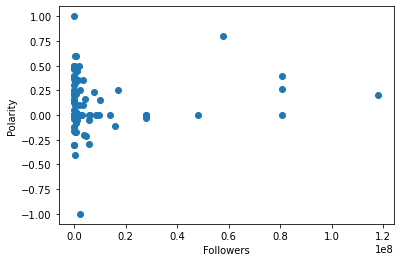

In [7]:
plt.scatter(covid19.followers,covid19.polarity)
plt.xlabel("Followers")
plt.ylabel("Polarity")

In [8]:
import statsmodels.api as sm
y = covid19.polarity
X = covid19.followers
X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:               polarity   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.082
Date:                Fri, 29 May 2020   Prob (F-statistic):              0.301
Time:                        14:33:15   Log-Likelihood:                -9.1237
No. Observations:                  90   AIC:                             22.25
Df Residuals:                      88   BIC:                             27.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0933      0.031      3.045      0.0